<a href="https://colab.research.google.com/github/shangeth/Google-ML-Academy/blob/master/2-Deep-Neural-Networks/2_1_Deep_Neural_Networks_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<h1 align="center"><a href='https://shangeth.com/courses/'>Deep Learning - Beginners Track</a></h1>
<h3 align="center">Instructor: <a href='https://shangeth.com/'>Shangeth Rajaa</a></h3>
<hr>

# Neural Network Architectures

We trained our first neural network in the previous notebook which had 3 layers
- Input Layer
- Hidden Layer
- Output Layer

![Neural Network 1 hidden 2 node](https://drive.google.com/uc?export=view&id=12Vhq8rzQKiCVsRIUuEzKcbW9qraBypNX)


## Multiple Nodes
The network had 2 linear layers($C_1$,0 $C_2$) in the hidden layer each of which gave us a linear classifier, then we used another linear layer($C_3$) in the output layer to combine $C_1$ and $C_2$ to give us a non-linear classifier($C$). Thaat was amazing, now we can get non-linear classifiers.

Won't it be even amazing it we can combine more than 2 linear classifiers?. Ofc yes, that will give a more accurate classifier. But how to combine 3 linear classifiers? 

Just increase the number of nodes in hidden layer.
![Neural Network 1 hidden 2 node](https://drive.google.com/uc?export=view&id=1mzc27z8h50Ctg3IlV4TOsD6rloEa_x_g)

This network will consider 3 linear layers and combine them to give a non-linear classifier/regressor. 

## Multiple layers (Deeper Neural Network)

Combination of multiple linear classifiers gives us a non-linear classifier, **What if we combine multiple non-linear classifiers?**
Won't that give us a more complex non-linear classifier which can fit/classify our data more accuractely?

How to do that?
We will take multiple copies of linear classifiers and combine them differently using another hidden layer instead of output layer and combine these non-linear classifiers using output layers.

- Input(Input Layer)
- n linear classifiers(Hidden Layer 1) 
- m non linear classifier = m combination of (n linear classifiers)
- output MORE COMPLEX classifier = combination of (m non-linear classifier)

![Neural Network 2 hidden 3,4 node](https://drive.google.com/uc?export=view&id=1Ie0dYwjx6a992MnWWI8ttAuednCN_XHW)

This network, will take 3 linear classifiers and make 4 different combination of linear classifiers to get 4 non-linear classifier and combine them to get a more complex Non-Linear Classifier. 

By stacking more Hidden Layers and nodes, we can get a more and more complex non-linear classifier/regressor. We visualized only for 2-D Data, this also applies for multi dimensional data, but unfortunately we cannot visualize multi dimensioanl data other than 2/3. In 3-d data the linear classifiers will be planes and the non-linear classifier will be some surface which are combinations of planes.

**This is Deep Neural network**.


Note: This is a mathematical analysis of how a neural network can make a more complex classifier/regressor, but we really do not know what features a neural network will consider to make the complex function. That is why its called Machine Learning, we can try to understand what features the model is using to classify, but can't be sure. 

Now Let's compare neural network with a deeper neural network and try to visualize the classifier.




# Deep neural Network in Tensorflow

## Dataset

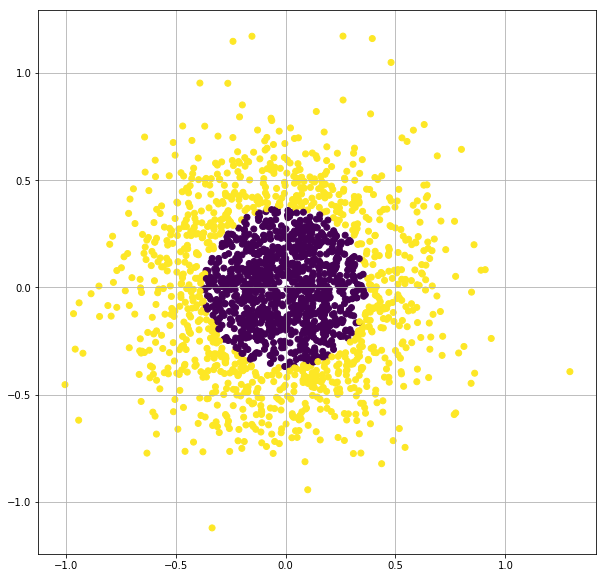

Train = 1120
Test = 600
Val = 280


In [49]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X, y = make_gaussian_quantiles(n_samples=2000, n_features=2, n_classes=2, random_state=3, cov=0.1)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1],c=y)
plt.grid(True)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

print('Train = {}\nTest = {}\nVal = {}'.format(len(X_train), len(X_test), len(X_val)))

## Linear Classifier (0 hidden layer)

Train on 1120 samples, validate on 280 samples
Epoch 1/20
1120/1120 [==============================] - 0s 107us/sample - loss: 0.7116 - acc: 0.4839 - val_loss: 0.7083 - val_acc: 0.5000
Epoch 2/20
1120/1120 [==============================] - 0s 40us/sample - loss: 0.7108 - acc: 0.4857 - val_loss: 0.7074 - val_acc: 0.4893
Epoch 3/20
1120/1120 [==============================] - 0s 38us/sample - loss: 0.7099 - acc: 0.4848 - val_loss: 0.7068 - val_acc: 0.4964
Epoch 4/20
1120/1120 [==============================] - 0s 38us/sample - loss: 0.7091 - acc: 0.4866 - val_loss: 0.7063 - val_acc: 0.5000
Epoch 5/20
1120/1120 [==============================] - 0s 37us/sample - loss: 0.7084 - acc: 0.4857 - val_loss: 0.7055 - val_acc: 0.4893
Epoch 6/20
1120/1120 [==============================] - 0s 36us/sample - loss: 0.7076 - acc: 0.4866 - val_loss: 0.7050 - val_acc: 0.5036
Epoch 7/20
1120/1120 [==============================] - 0s 36us/sample - loss: 0.7069 - acc: 0.4875 - val_loss: 0.7044 - val_acc: 

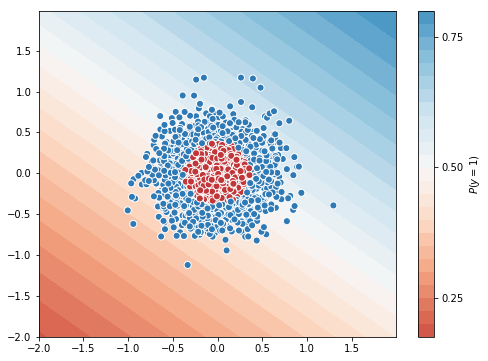


Test Accuracy =  0.5183333333333333


In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=1, input_shape=[2]), 
                             keras.layers.Activation('sigmoid')
                             ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, epochs=20, verbose=True, validation_data=(X_val, y_val))


# contour plot
xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


You can train for more epochs, but the model won't really impove the metrics.

## Neural network (1 hidden layer, 3 hidden units)

Train on 1120 samples, validate on 280 samples
Epoch 1/500
1120/1120 [==============================] - 0s 120us/sample - loss: 0.7086 - acc: 0.4982 - val_loss: 0.6955 - val_acc: 0.5429
Epoch 2/500
1120/1120 [==============================] - 0s 43us/sample - loss: 0.7065 - acc: 0.5080 - val_loss: 0.6948 - val_acc: 0.5679
Epoch 3/500
1120/1120 [==============================] - 0s 39us/sample - loss: 0.7048 - acc: 0.5170 - val_loss: 0.6943 - val_acc: 0.5750
Epoch 4/500
1120/1120 [==============================] - 0s 40us/sample - loss: 0.7033 - acc: 0.5232 - val_loss: 0.6935 - val_acc: 0.5679
Epoch 5/500
1120/1120 [==============================] - 0s 40us/sample - loss: 0.7018 - acc: 0.5259 - val_loss: 0.6932 - val_acc: 0.5750
Epoch 6/500
1120/1120 [==============================] - 0s 39us/sample - loss: 0.7006 - acc: 0.5321 - val_loss: 0.6927 - val_acc: 0.5786
Epoch 7/500
1120/1120 [==============================] - 0s 39us/sample - loss: 0.6994 - acc: 0.5393 - val_loss: 0.6925 - va

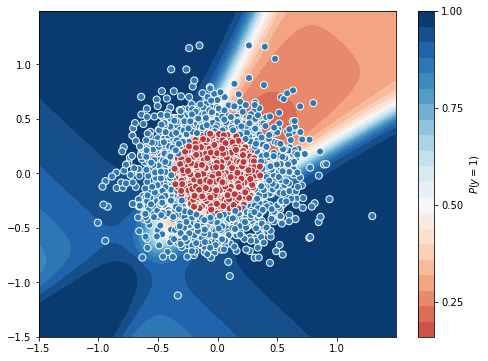


Test Accuracy =  0.7683333333333333


In [53]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=3, input_shape=[2]), 
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=1), 
                             keras.layers.Activation('sigmoid')
                             ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, epochs=500, verbose=True, validation_data=(X_val, y_val))


# contour plot
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


This model learnt some complex classifer, but you can see by adding a hidden layer with 3 nodes, the accuracy increased a lot.

Now Let's increase the no of nodes in the hidden layer

## Neural network (1 hidden layer, 10 hidden units)

Train on 1120 samples, validate on 280 samples
Epoch 1/500
1120/1120 [==============================] - 0s 115us/sample - loss: 0.6930 - acc: 0.5321 - val_loss: 0.6990 - val_acc: 0.5393
Epoch 2/500
1120/1120 [==============================] - 0s 41us/sample - loss: 0.6924 - acc: 0.5670 - val_loss: 0.6982 - val_acc: 0.5286
Epoch 3/500
1120/1120 [==============================] - 0s 42us/sample - loss: 0.6920 - acc: 0.5955 - val_loss: 0.6983 - val_acc: 0.5500
Epoch 4/500
1120/1120 [==============================] - 0s 45us/sample - loss: 0.6918 - acc: 0.5875 - val_loss: 0.6977 - val_acc: 0.5214
Epoch 5/500
1120/1120 [==============================] - 0s 42us/sample - loss: 0.6915 - acc: 0.6045 - val_loss: 0.6976 - val_acc: 0.5500
Epoch 6/500
1120/1120 [==============================] - 0s 41us/sample - loss: 0.6914 - acc: 0.6232 - val_loss: 0.6971 - val_acc: 0.5393
Epoch 7/500
1120/1120 [==============================] - 0s 48us/sample - loss: 0.6912 - acc: 0.6366 - val_loss: 0.6973 - va

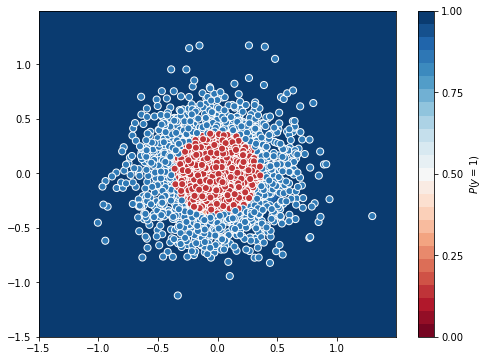


Test Accuracy =  0.97


In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=10, input_shape=[2]), 
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=1), 
                             keras.layers.Activation('sigmoid')
                             ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, epochs=500, verbose=True, validation_data=(X_val, y_val))


# contour plot
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


## Neural network (2 hidden layers, 10 hidden units, 10 hidden units)

Train on 1120 samples, validate on 280 samples
Epoch 1/500
1120/1120 [==============================] - 0s 139us/sample - loss: 0.7011 - acc: 0.5357 - val_loss: 0.6926 - val_acc: 0.6036
Epoch 2/500
1120/1120 [==============================] - 0s 50us/sample - loss: 0.6947 - acc: 0.6000 - val_loss: 0.6925 - val_acc: 0.6321
Epoch 3/500
1120/1120 [==============================] - 0s 48us/sample - loss: 0.6924 - acc: 0.5482 - val_loss: 0.6942 - val_acc: 0.5071
Epoch 4/500
1120/1120 [==============================] - 0s 48us/sample - loss: 0.6917 - acc: 0.6187 - val_loss: 0.6942 - val_acc: 0.5821
Epoch 5/500
1120/1120 [==============================] - 0s 52us/sample - loss: 0.6908 - acc: 0.6527 - val_loss: 0.6952 - val_acc: 0.6107
Epoch 6/500
1120/1120 [==============================] - 0s 49us/sample - loss: 0.6907 - acc: 0.6402 - val_loss: 0.6946 - val_acc: 0.5857
Epoch 7/500
1120/1120 [==============================] - 0s 49us/sample - loss: 0.6901 - acc: 0.6491 - val_loss: 0.6956 - va

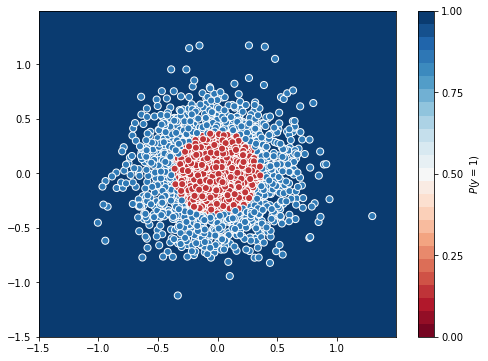


Test Accuracy =  0.9916666666666667


In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=10, input_shape=[2]), 
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=10),
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=1), 
                             keras.layers.Activation('sigmoid')
                             ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, epochs=500, verbose=True, validation_data=(X_val, y_val))


# contour plot
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


## Performance of Different NN Architectures

| Model Architecture                  	| Test Accuracy 	|
|-------------------------------------	|---------------	|
| 0 hidden layer                      	| 0.518         	|
| 1 hidden layer, 3 hidden units      	| 0.768         	|
| 1 hidden layer, 10 hidden units     	| 0.970         	|
| 2 hidden layers, 10-10 hidden units 	| 0.991         	|

you have seen how deeper model can help. As the model goes more deeper and complex, the performance of the model increases(although this may not be the case everytime, especially when we have less data and there is something called vanishing gradients, which we will discuss later). But in general, deeper models improves performance.
